<a href="https://colab.research.google.com/github/LilySaya/MachineLearning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statistics as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [ ]:
#Get data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names).assign(target = iris.target)

#Prepare parameters
x = df[['petal length (cm)','petal width (cm)']]
n_samples, n_features = x.shape
x = x.to_numpy()
X = np.column_stack([np.ones(n_samples),x])


y = df['target']
y = y.to_numpy()
y = y.T
y = y.reshape(-1,1)

new_y = []
new_x = []
for i in range(y.shape[0]):
  if y[i] == 0:
    new_y.append(-1)
    new_x.append(x[i,:])
  elif y[i] == 1:
    new_y.append(1)
    new_x.append(x[i,:])

new_x = np.array(new_x)
new_y = np.array(new_y)
new_y = new_y.reshape(-1,1)
#Train test split
X_train, X_test, y_train, y_test =  train_test_split(new_x,new_y, random_state = 0, test_size = 0.1)
X_train = X_train.T
X_test = X_test.T
y_test = y_test.T
y_train = y_train.T



print(X_train.shape)
print(y_train.shape)
print(w)
print(X_train[:,1].shape)
print(y_train[0,1].shape)

(2, 90)
(1, 90)
[[-0.26558429]
 [ 0.23624415]
 [ 0.17920572]]
(2,)
()


In [ ]:
eta = 0.0001 #learning rate
w = np.zeros((2,1))
b = 0

for i in range(1000):
  #dw = np.zeros((3,1))
  for n in range(y_train.shape[1]):
    factor = (w.T@ (X_train[:,n].reshape(-1,1))  + b)*(y_train[0,n])
    if factor >= 1:
      dw = w
      db = 0
    else:
      dw = w - (X_train[:,n].reshape(-1,1)*y_train[0,n])    
      db = -y_train[0,n]
    w = w - dw*eta
    b = b - db*eta
print(w)

def predict_SVM (x):
  return np.sign(w.T@x+b)


[[0.56004032]
 [0.26093205]]
[[ 1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1
   1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1
  -1  1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1
   1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1]]
[[ 1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.
   1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.
  -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1.
   1.  1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.
   1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.]]
[[2.55327975]]
1


In [ ]:
def colorlist_SVM(input):
    input = input.T
    cols=[]
    for value in input:
        if value < 0:
            cols.append('red')
        elif value >0:
            cols.append('blue')
    return cols

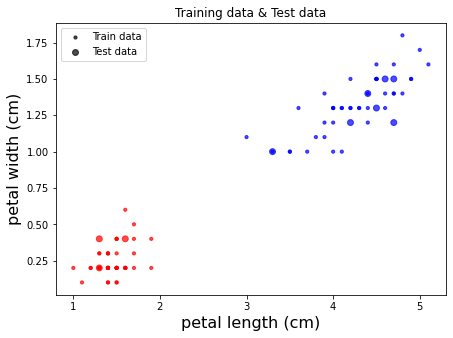

In [ ]:
#Plot 1 for Training data & Test data
fig, ax = plt.subplots(figsize=(7,5))
train = ax.scatter(X_train[0,:], X_train[1,:], alpha = 0.7, s = 10, c = colorlist_SVM(y_train))
test = ax.scatter(X_test[0,:], X_test[1,:], alpha = 0.7, s = 35, c = colorlist_SVM(y_test))
plt.legend((train,test),("Train data","Test data"))
ax.set_title("Training data & Test data")
ax.set_xlabel("petal length (cm)", fontsize=16)
ax.set_ylabel("petal width (cm)", fontsize=16)

#Legend Handles
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

Text(0, 0.5, 'petal width (cm)')

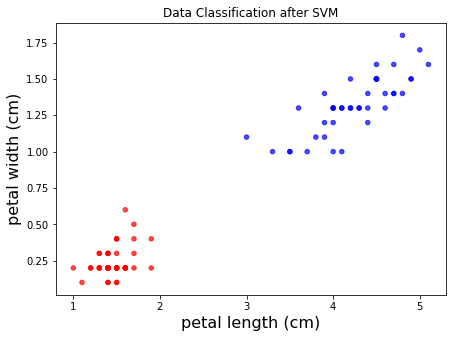

In [ ]:
#Plot 2 for Data after SVM
fig, ax = plt.subplots(figsize=(7,5))
train = ax.scatter(X_train[0,:], X_train[1,:], alpha = 0.7, s = 20, c = colorlist_SVM(predict_SVM(X_train)))
ax.set_title("Data Classification after SVM")
ax.set_xlabel("petal length (cm)", fontsize=16)
ax.set_ylabel("petal width (cm)", fontsize=16)

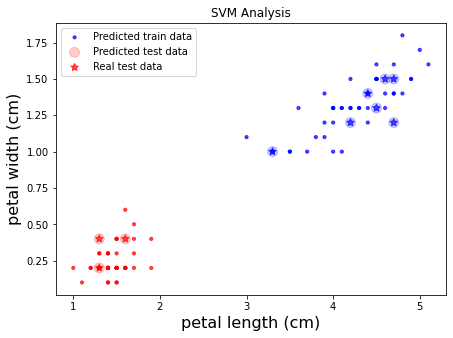

In [ ]:
#Plot 3 for Analysis
fig, ax = plt.subplots(figsize=(7,5))
train = ax.scatter(X_train[0,:], X_train[1,:], alpha = 0.7, s = 10, c = colorlist_SVM(predict_SVM(X_train)))
test_result = ax.scatter(X_test[0,:], X_test[1,:], alpha = 0.2, s = 100, c = colorlist_SVM(predict_SVM(X_test)))
test_real = ax.scatter(X_test[0,:], X_test[1,:], alpha = 0.7, s = 60, marker = (5,1), c = colorlist_SVM(y_test))
ax.set_title("SVM Analysis")
ax.set_xlabel("petal length (cm)", fontsize=16)
ax.set_ylabel("petal width (cm)", fontsize=16)

plt.legend((train,test_result, test_real),("Predicted train data","Predicted test data","Real test data"))